In [1]:
from brainmri.dataset.stacker import MriStacker
from brainmri.dataset.dataset import *
from brainmri.runner.train import train_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import segmentation_models_pytorch as smp

In [2]:
config = {
     'make_stacks': True,
     'stack_size': 3,
     'data_dir': './data/lgg-mri-segmentation/kaggle_3m/',
     'out_dir': './data/lgg-mri-segmentation/2.5D/StackSize=3',
     'model_out_pth': './models/unet-resnet18_aug_{date}.pth',
     'augmentations': True,
     'epochs': 75,
     'batch_size': 64,
     'lr': 5e-05,
     'optimizer': 'adam',
     'model': 'unet',
     'model_encoder': 'resnet18',
     'model_act': 'sigmoid',
     'encoder_weights': 'imagenet',
     'device': 'cuda',
     'num_classes': 1
}

In [3]:
stacker = MriStacker(root_dir=config.get("data_dir"),
                         out_dir=config.get("out_dir"),
                         stack_size=config.get("stack_size"))

if config.get("make_stacks"):
    stacker.process_patients()

stacker.gen_train_val_test_split()


preprocessing_fn = get_preprocessing_fn(config.get("model_encoder"), config.get("encoder_weights"))
train_ds = BrainMriSegmentation(stacker.train_df, config.get("stack_size"),
                                transforms=get_augmentations(is_train=True, apply_transforms=config.get("augmentations")),
                                preprocessing=get_preprocessing(preprocessing_fn))
valid_ds = BrainMriSegmentation(stacker.valid_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))

train_dl = get_dataloader(train_ds, bs=config.get("batch_size"))
valid_dl = get_dataloader(valid_ds, bs=config.get("batch_size"))

train_loss, val_loss, train_fscore, val_fscore, train_iou, val_iou  = train_model(config, train_dl, valid_dl)


/home/nlittlefield/.local/lib/python3.6/site-packages/albumentations/augmentations/transforms.py:1741: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  warnings.warn('Using lambda is incompatible with multiprocessing. '


Training unet w/ resnet18 backbone
Let's use 2 GPUs!

Epoch: 0
valid: 100%|██████████| 10/10 [00:01<00:00,  5.28it/s, dice_loss - 0.9354, iou_score - 0.1496, fscore - 0.2598]
Model saved!

Epoch: 1
valid: 100%|██████████| 10/10 [00:01<00:00,  5.11it/s, dice_loss - 0.9214, iou_score - 0.1776, fscore - 0.3012]
Model saved!

Epoch: 2
valid: 100%|██████████| 10/10 [00:01<00:00,  5.30it/s, dice_loss - 0.8976, iou_score - 0.2286, fscore - 0.3713]
Model saved!

Epoch: 3
valid: 100%|██████████| 10/10 [00:01<00:00,  5.29it/s, dice_loss - 0.8722, iou_score - 0.4302, fscore - 0.6004]
Model saved!

Epoch: 4
valid: 100%|██████████| 10/10 [00:01<00:00,  5.02it/s, dice_loss - 0.8435, iou_score - 0.399, fscore - 0.5682]

Epoch: 5
valid: 100%|██████████| 10/10 [00:01<00:00,  5.24it/s, dice_loss - 0.8232, iou_score - 0.4425, fscore - 0.6124]
Model saved!

Epoch: 6
valid: 100%|██████████| 10/10 [00:01<00:00,  5.33it/s, dice_loss - 0.781, iou_score - 0.538, fscore - 0.6984] 
Model saved!

Epoch: 7
valid: 

valid: 100%|██████████| 10/10 [00:01<00:00,  5.29it/s, dice_loss - 0.229, iou_score - 0.7758, fscore - 0.8731]

Epoch: 34
valid: 100%|██████████| 10/10 [00:01<00:00,  5.34it/s, dice_loss - 0.2218, iou_score - 0.7737, fscore - 0.872]

Epoch: 35
valid: 100%|██████████| 10/10 [00:01<00:00,  5.36it/s, dice_loss - 0.215, iou_score - 0.7696, fscore - 0.8693]

Epoch: 36
valid: 100%|██████████| 10/10 [00:01<00:00,  5.29it/s, dice_loss - 0.2008, iou_score - 0.7868, fscore - 0.8805]
Model saved!

Epoch: 37
valid: 100%|██████████| 10/10 [00:01<00:00,  5.24it/s, dice_loss - 0.2184, iou_score - 0.7687, fscore - 0.8691]

Epoch: 38
valid: 100%|██████████| 10/10 [00:01<00:00,  5.34it/s, dice_loss - 0.1971, iou_score - 0.7926, fscore - 0.8837]
Model saved!

Epoch: 39
valid: 100%|██████████| 10/10 [00:01<00:00,  5.31it/s, dice_loss - 0.1927, iou_score - 0.7896, fscore - 0.8821]

Epoch: 40
valid: 100%|██████████| 10/10 [00:01<00:00,  5.25it/s, dice_loss - 0.1836, iou_score - 0.7921, fscore - 0.8832]

Epo

valid: 100%|██████████| 10/10 [00:01<00:00,  5.33it/s, dice_loss - 0.1355, iou_score - 0.7977, fscore - 0.8866]

Epoch: 69
valid: 100%|██████████| 10/10 [00:01<00:00,  5.20it/s, dice_loss - 0.1364, iou_score - 0.7965, fscore - 0.886]

Epoch: 70
valid: 100%|██████████| 10/10 [00:01<00:00,  5.26it/s, dice_loss - 0.1332, iou_score - 0.8019, fscore - 0.8895]

Epoch: 71
valid: 100%|██████████| 10/10 [00:01<00:00,  5.15it/s, dice_loss - 0.132, iou_score - 0.801, fscore - 0.889]   

Epoch: 72
valid: 100%|██████████| 10/10 [00:01<00:00,  5.22it/s, dice_loss - 0.1258, iou_score - 0.8088, fscore - 0.894]
Model saved!

Epoch: 73
valid: 100%|██████████| 10/10 [00:01<00:00,  5.11it/s, dice_loss - 0.1386, iou_score - 0.7976, fscore - 0.8865]

Epoch: 74
valid: 100%|██████████| 10/10 [00:01<00:00,  5.09it/s, dice_loss - 0.1214, iou_score - 0.8116, fscore - 0.8959]
Model saved!


In [4]:
import torch.nn
best_model = torch.load("./models/unet-resnet18_aug_2021-08-25.pth")

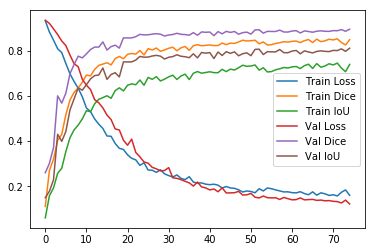

In [5]:
plt.plot(train_loss)
plt.plot(train_fscore)
plt.plot(train_iou)
plt.plot(val_loss)
plt.plot(val_fscore)
plt.plot(val_iou)                                                                                

plt.legend(["Train Loss",  "Train Dice", "Train IoU", "Val Loss", "Val Dice", "Val IoU"])

In [6]:
test_ds = BrainMriSegmentation(stacker.test_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))
test_dl = get_dataloader(test_ds, bs=config.get("batch_size"))

In [7]:
loss = smp.utils.losses.DiceLoss()
metrics = [smp.utils.metrics.IoU(threshold=0.5), smp.utils.metrics.Fscore(threshold=0.5)]
    
test_epoch =  smp.utils.train.ValidEpoch(
    best_model,
    loss=loss,
    metrics=metrics,
    device=config.get("device"),
    verbose=True
)

In [8]:
test_epoch.run(test_dl)

valid: 100%|██████████| 6/6 [00:01<00:00,  5.21it/s, dice_loss - 0.1562, iou_score - 0.7608, fscore - 0.8624]


{'dice_loss': 0.15616063276926676,
 'iou_score': 0.7608039776484171,
 'fscore': 0.8624442517757416}